In [34]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interpn
from skimage.restoration import richardson_lucy as de
%matplotlib notebook

In [35]:
x, y, z, T, t, settings = load_data("edge1", range(1,4))
x = x[0]
y = y[0]
settings = settings[0]

In [16]:
def logscale(x, a=1):
    return np.log(x - x.min() + 1) ** (1/a)

In [4]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

In [29]:
sf = sensor.flatten()
dsf = np.gradient(sf)

<IPython.core.display.Javascript object>


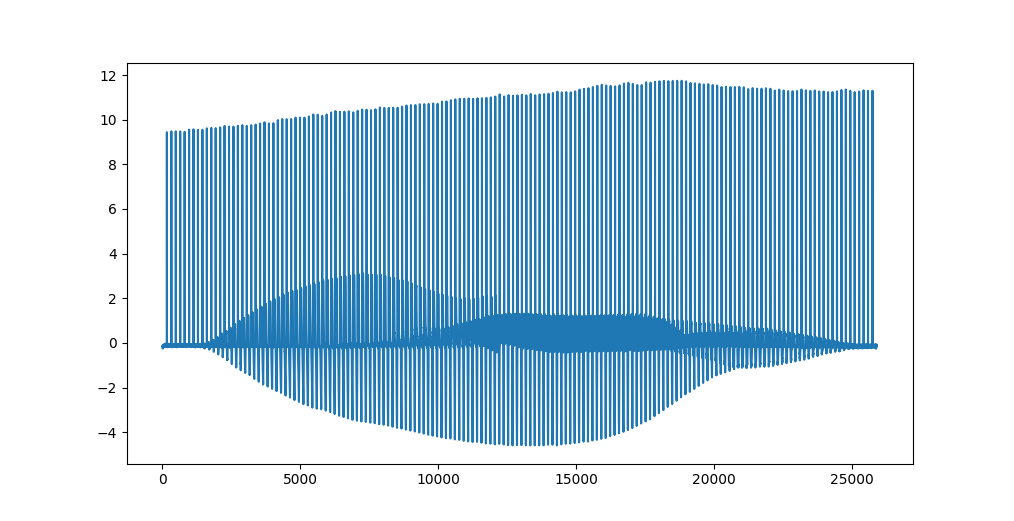

In [32]:
plt.plot(dsf)

In [14]:
settings

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((8.5, 24.5, 0.1), (14.5, 30.5, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

<IPython.core.display.Javascript object>


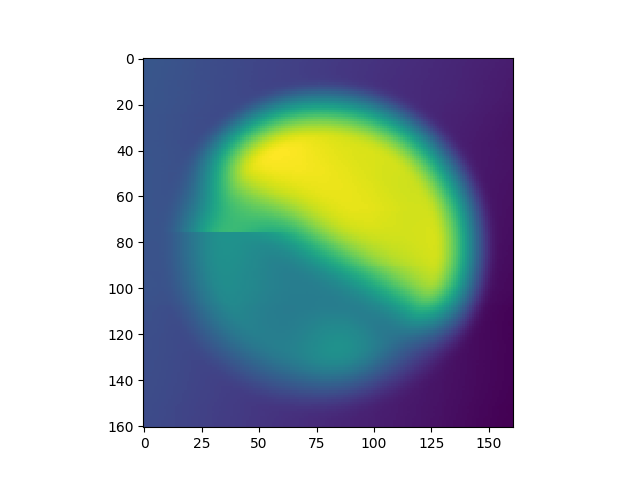

12076

In [27]:
plt.imshow(sensor)
np.ravel_multi_index((75, 1), sensor.shape)

<IPython.core.display.Javascript object>


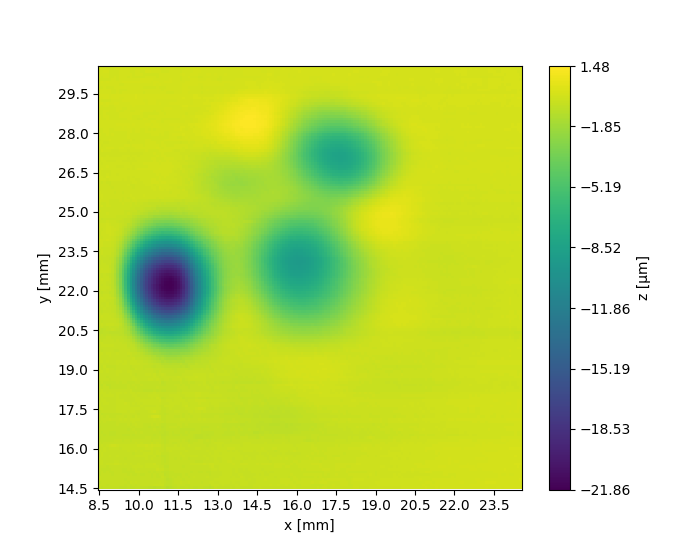

In [37]:
sensor = z[0][0].max() - z[0][0]
sensor2 = z[1][0].max() - z[1][0]
sensor3 = z[2][0].max() - z[2][0]
#background2 = z[12][0].max() - z[12][0]
#signal = sensor - background
noise = sensor2 - sensor3
plot(x, y, noise)
#plot(x, y, noise)

diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

#kernel = sensor_function(diameter / stepsize, sigma)
#z_reconstructed = wiener(signal, kernel, noise * 0.0005, 1, extra=6)
#fig, ax = plot(x, y, z_reconstructed)
#profile = ProfileBuilder(fig, ax)